<a href="https://colab.research.google.com/github/SauravTelge/SpamEmailClassification/blob/main/SpamEmailClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
path = "/content/sample_data/email.csv"
df = pd.read_csv(path)
print(df)

                                                   text  spam
0     Subject: naturally irresistible your corporate...     1
1     Subject: the stock trading gunslinger  fanny i...     1
2     Subject: unbelievable new homes made easy  im ...     1
3     Subject: 4 color printing special  request add...     1
4     Subject: do not have money , get software cds ...     1
...                                                 ...   ...
5723  Subject: re : research and development charges...     0
5724  Subject: re : receipts from visit  jim ,  than...     0
5725  Subject: re : enron case study update  wow ! a...     0
5726  Subject: re : interest  david ,  please , call...     0
5727  Subject: news : aurora 5 . 2 update  aurora ve...     0

[5728 rows x 2 columns]


In [6]:
df.drop_duplicates(inplace = True)
df.shape

(5695, 2)

In [7]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [8]:
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

PUNCT_TO_REMOVE = string.punctuation
df["text"] = df["text"].str.lower()
df["text"] = df["text"].apply(lambda text: remove_punctuation(text))
STOPWORDS = set(stopwords.words('english'))
STOPWORDS.add('subject')
df["text"] = df["text"].apply(lambda text: remove_stopwords(text))
lemmatizer = WordNetLemmatizer()
df["text"] = df["text"].apply(lambda text: lemmatize_words(text))
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,text,spam
0,naturally irresistible corporate identity lt r...,1
1,stock trading gunslinger fanny merrill muzo co...,1
2,unbelievable new home made easy im wanting sho...,1
3,4 color printing special request additional in...,1
4,money get software cd software compatibility g...,1


In [9]:
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = df['text']
y = df['spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [10]:
import seaborn as sns
def print_cm(cf_matrix):
  sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

1. Naive Bayes Classifier

Accuracy score of Naive Bayes model is  0.9069359086918349
F1 score of Naive Bayes model is 0.7546296296296297


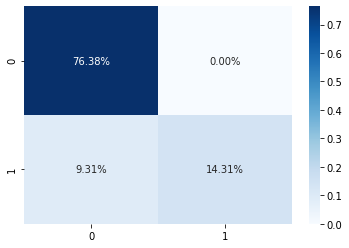

In [11]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train,y_train)
y_pred = nb_classifier.predict(X_test)

accuracy_nb = accuracy_score(y_test,y_pred)
print ("Accuracy score of Naive Bayes model is ", accuracy_nb)
f1_nb = f1_score(y_test,y_pred)
print ("F1 score of Naive Bayes model is", f1_nb)
matrix_nb= confusion_matrix(y_test,y_pred)
print_cm(matrix_nb)

2. SVM Classifier

Accuracy score of SVM model is  0.9885864793678666
F1 score of SVM model is 0.975517890772128


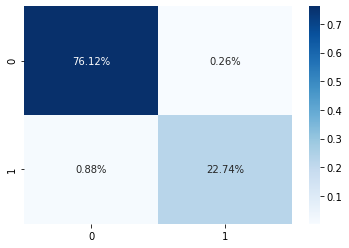

In [12]:
svm_classifier = svm.SVC()
svm_classifier.fit(X_train,y_train)
y_pred = svm_classifier.predict(X_test)

accuracy_svm = accuracy_score(y_test,y_pred)
print ("Accuracy score of SVM model is ", accuracy_svm)
f1_svm = f1_score(y_test,y_pred)
print ("F1 score of SVM model is", f1_svm)
matrix_svm = confusion_matrix(y_test,y_pred)
print_cm(matrix_svm)

In [13]:

from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.819, total=   6.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.5s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.801, total=   6.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.9s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.813, total=   6.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.806, total=   6.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.817, total=   6.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.759, total=   5.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.760, total=   5.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.759, total=   5.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.759, total=   5.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 10.5min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [14]:

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [16]:
from sklearn.metrics import classification_report
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       870
           1       0.99      0.99      0.99       269

    accuracy                           0.99      1139
   macro avg       0.99      0.99      0.99      1139
weighted avg       0.99      0.99      0.99      1139



Accuracy score of SVM model is  0.9947322212467077
F1 score of SVM model is 0.9888475836431226


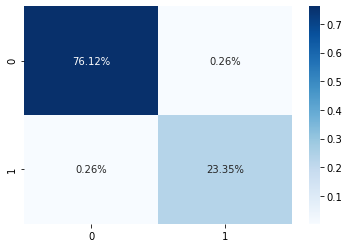

In [18]:
accuracy_svm1 = accuracy_score(y_test,grid_predictions)
print ("Accuracy score of SVM model is ", accuracy_svm)
f1_svm1 = f1_score(y_test,grid_predictions)
print ("F1 score of SVM model is", f1_svm1)
matrix_svm1 = confusion_matrix(y_test,grid_predictions)
print_cm(matrix_svm1)

3. Decision Tree

Accuracy score of Decision tree model is  0.9543459174714662
F1 score of df model is 0.9026217228464418


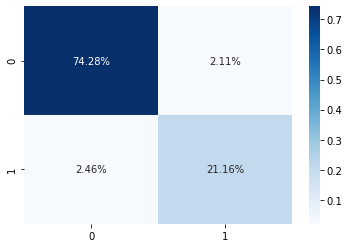

In [19]:
model_tree=DecisionTreeClassifier()
model_tree.fit(X_train,y_train)
predicted_class_tree=model_tree.predict(X_test)

accuracy_dt = accuracy_score(y_test,predicted_class_tree)
print ("Accuracy score of Decision tree model is ", accuracy_dt)
f1_dt = f1_score(y_test,predicted_class_tree)
print ("F1 score of df model is", f1_dt)
matrix_dt = confusion_matrix(y_test,predicted_class_tree)
print_cm(matrix_dt)

4. Random Forest

Accuracy score of Random forest model is  0.9789288849868305
F1 score of SVM model is 0.9533073929961089


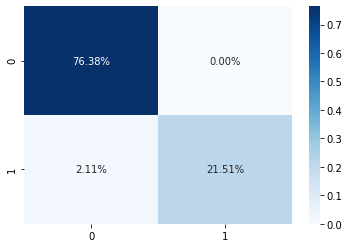

In [20]:
model_rf=RandomForestClassifier(n_estimators=100,criterion='entropy')
model_rf.fit(X_train,y_train)
predicted_class_rf=model_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test,predicted_class_rf)
print ("Accuracy score of Random forest model is ", accuracy_rf)
f1_rf = f1_score(y_test,predicted_class_rf)
print ("F1 score of SVM model is", f1_rf)
matrix_rf = confusion_matrix(y_test,predicted_class_rf)
print_cm(matrix_rf)

5. Gradiant Boosting Classifier

Accuracy score of Gradiant Boosting model is  0.9692712906057945
F1 score of Gradiant Boosting model is 0.932562620423892


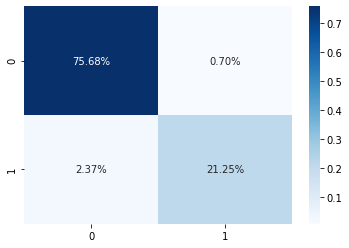

In [21]:
clf = GradientBoostingClassifier(n_estimators=150, learning_rate=1.0, max_depth=3, random_state=0).fit(X_train, y_train)

predicted_class_gb=clf.predict(X_test)

accuracy_gb = accuracy_score(y_test,predicted_class_gb)
print ("Accuracy score of Gradiant Boosting model is ", accuracy_gb)
f1_gb = f1_score(y_test,predicted_class_gb)
print ("F1 score of Gradiant Boosting model is", f1_gb)
matrix_gb = confusion_matrix(y_test,predicted_class_gb)
print_cm(matrix_gb)

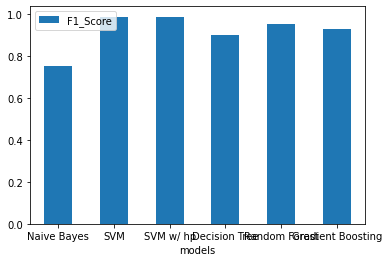

In [24]:
dict1= {"models":['Naive Bayes','SVM','SVM w/ hp','Decision Tree', 'Random Forest', 'Gradient Boosting'],"F1_Score":[f1_nb,f1_svm,f1_svm1,f1_dt,f1_rf,f1_gb]}
df=pd.DataFrame.from_dict(dict1)
ax = df.plot.bar(x='models', y='F1_Score', rot=0)

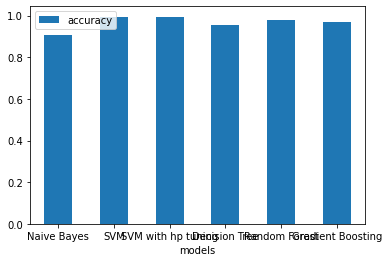

In [25]:
dict2= {"models":['Naive Bayes','SVM','SVM with hp tuning','Decision Tree', 'Random Forest', 'Gradient Boosting'],"accuracy":[accuracy_nb,accuracy_svm,accuracy_svm1,accuracy_dt,accuracy_rf,accuracy_gb]}
df=pd.DataFrame.from_dict(dict2)
ax = df.plot.bar(x='models', y='accuracy', rot=0)